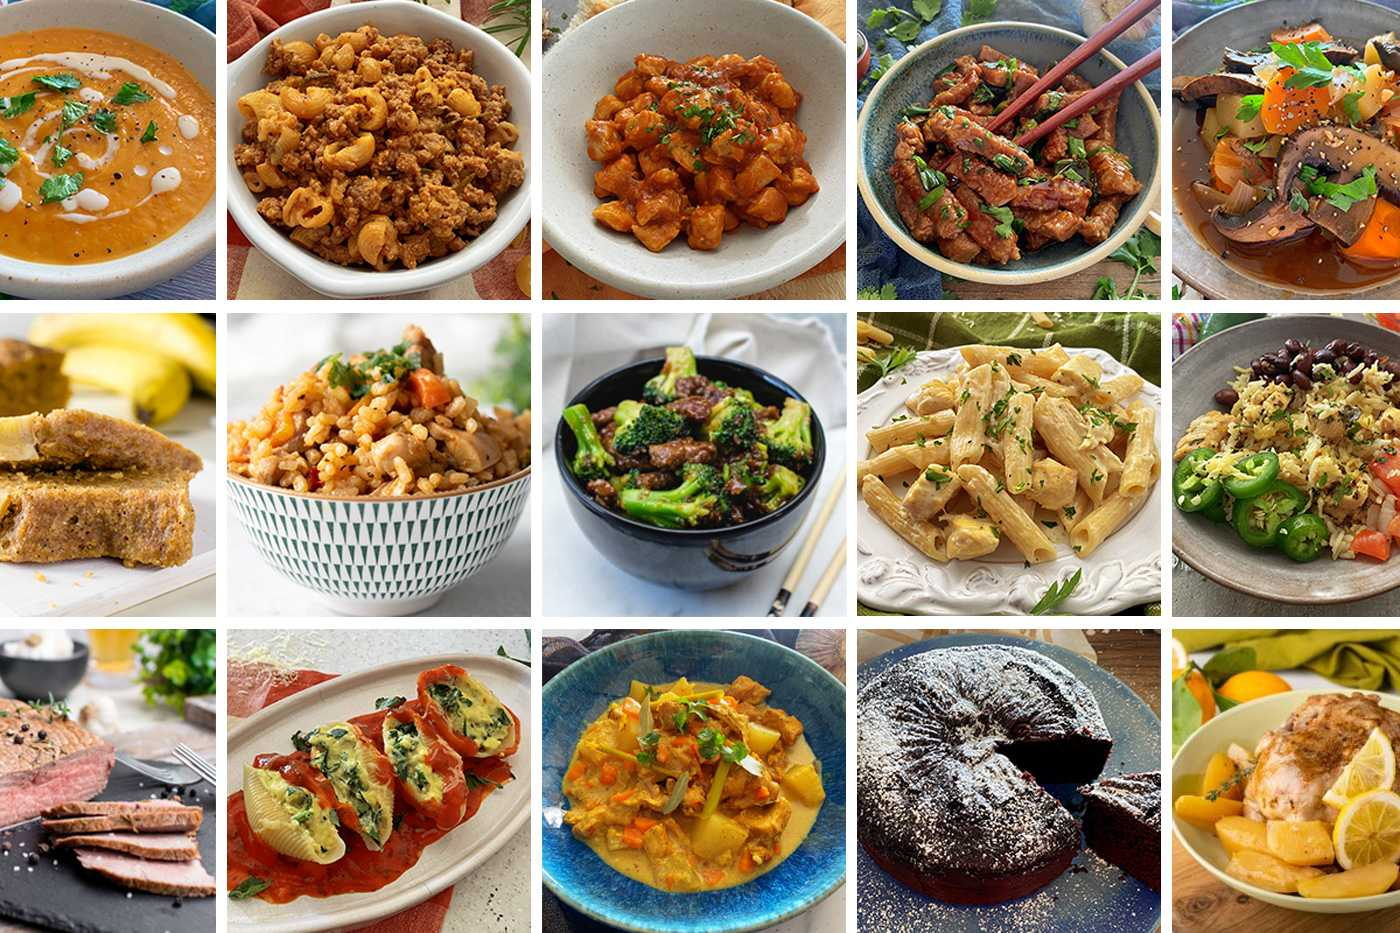

In [15]:
#show picture
from IPython.display import Image
Image(filename='Instant-Pot-Recipes.jpg')

# Objective: Increase site traffic by predicting recipe popularity

    - Create a written report to summarize the analysis you have performed and your findings.

        ● Data validation:
            ○ Describe validation and cleaning steps for every column in the data

        ● Exploratory Analysis to answer the customer questions ensuring you include:
            ○ Two different types of graphic showing single variables only
            ○ At least one graphic showing two or more variables
            ○ Description of your findings
        ● Model Development including:
            ○ What type of problem this is
            ○ Fitting a baseline model
            ○ Fitting a comparison model

        ● Model evaluation
            ○ Show how the two models compare

        ● Definition of a metric for the business to monitor
            ○ How should the business monitor what they want to achieve?
            ○ Estimate the initial value(s) for the metric based on the current data?
            
        ● Final summary including recommendations that the business should undertake
            - Prepare and deliver a presentation of max 10 slides to the product owner.

# Environment Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#allow plots to appear directly in the notebook
%matplotlib inline
#show all columns in pandas
pd.set_option('display.max_columns', None)

In [13]:
#function to see percentage of missing values
def missing_values(df):
    missing = pd.DataFrame(df.isnull().sum())
    missing['%'] = round((missing[0]/len(df))*100, 2)
    missing.columns = ['Missing Values', '%']
    return missing.sort_values(by='Missing Values', ascending=False)

#function to plot disribution of all variables in a dataframe with dtype = int64 or float64
def plot_distributions(df):
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            sns.distplot(df[col])
            plt.show()

# Importing dataset

In [6]:
#import data
df = pd.read_csv('recipe_site_traffic_2212.csv')

## Checking the dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [12]:
df.shape

(947, 8)

    The data is as follows:

    - Recipe: Has a unique identificator which is an integer64              0% of nulls
    - Calories: Float indicating number of calories                         5.5% of nulls
    - Carbohydrate: Float indicating amount of carbohydrates                5.5% of nulls
    - Sugar: Float indicating amount of sugar                               5.5% of nulls
    - Protein: Float indicating amount of proteins                          5.5% of nulls
    - Category: String with 10 categories of food                           0% of nulls
    - Servings: String indicating a number with no of people                0% of nulls
    - High Traffic: String indicating whether there is high traffic or not  0% of nulls

In [14]:
missing_values(df)

,Missing Values,%
high_traffic,373,39.39
calories,52,5.49
carbohydrate,52,5.49
sugar,52,5.49
protein,52,5.49
recipe,0,0.00
category,0,0.00
servings,0,0.00


In [9]:
#checking head and tail of df to see if it conforms with what we have seen so far
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [25]:
#set index to recipe 
df.set_index('recipe', inplace=True)

# Data Preparation

    After having a sneak peak at the data, here is a to do list to make it ready to start with EDA, feature engineering and rest of pipeline

        - Check categories and dummify accordingly without duplicates
        - Check nulls and come up with an strategy 
        - Convert servings to an integer, no reason for a string to be there
        - Convert y objective variable to a boolean with 0 or 1 for low and high traffic
    

## Patching Up Servings feature

In [16]:
#show unique values for servings
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [17]:
#deleting " as a snack" from servings
df['servings'] = df['servings'].str.replace(' as a snack', '')

In [18]:
df['servings'].unique()

array(['6', '4', '1', '2'], dtype=object)

In [19]:
#convert servings to int
df['servings'] = df['servings'].astype(int)

## Checking target variable

In [20]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [21]:
#convert "High" to 1 and "nan" to 0, and set dtype as bool
df['high_traffic'] = df['high_traffic'].replace('High', 1)
df['high_traffic'] = df['high_traffic'].fillna(0)
df['high_traffic'] = df['high_traffic'].astype(bool)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    bool   
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 52.8+ KB


## Previsualization of df

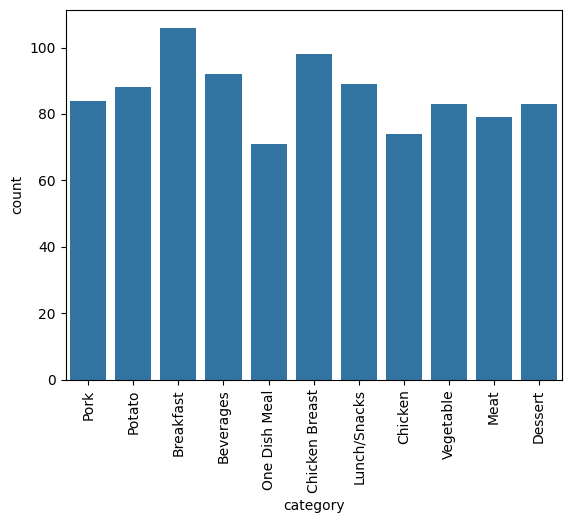

In [29]:
#barplot of df_nulls with x axis category and y axis number of nulls
sns.countplot(x='category', data=df)
plt.xticks(rotation=90)
plt.show()

## Dealing with nulls

In [23]:
#show nulls in df
df.isnull().sum()
 

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [32]:
#subset with rows with nulls
df_nulls = df[df.isnull().any(axis=1)]
df_nulls

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,True
24,NaN,NaN,NaN,NaN,Meat,2,False
49,NaN,NaN,NaN,NaN,Chicken Breast,4,False
83,NaN,NaN,NaN,NaN,Meat,4,True
90,NaN,NaN,NaN,NaN,Pork,6,True
117,NaN,NaN,NaN,NaN,Chicken Breast,6,True
122,NaN,NaN,NaN,NaN,Dessert,2,True
137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
150,NaN,NaN,NaN,NaN,Potato,2,True


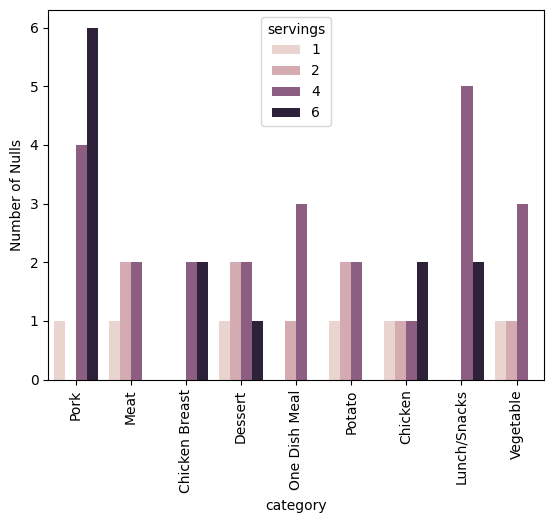

In [44]:
#barplot of df_nulls with x axis category and y axis number of nulls

sns.countplot(x='category', data=df_nulls, hue='servings')
plt.xticks(rotation=90)
#y tick title
plt.ylabel('Number of Nulls')
plt.show()


There appear to be many categories overlapping itself and some names are misleading, we will take care of that later

In [43]:
#for each category in category column, show mean, std, min, max, and quartiles for calories, carbohydrate, sugar and protein
for category in df['category'].unique():
    print(category)
    print(df[df['category'] == category][['calories', 'carbohydrate', 'sugar', 'protein']].describe())
    print('\n')

Pork
          calories  carbohydrate      sugar     protein
count    73.000000     73.000000  73.000000   73.000000
mean    629.708082     28.076164   8.040137   43.797671
std     624.531554     25.668843   9.293900   46.481453
min       1.560000      0.470000   0.080000    1.320000
25%     144.280000      7.520000   1.890000   13.870000
50%     399.260000     19.560000   5.230000   29.820000
75%     951.740000     42.530000   9.400000   52.000000
max    2906.010000    111.080000  49.530000  189.330000


Potato
          calories  carbohydrate      sugar    protein
count    83.000000     83.000000  83.000000  83.000000
mean    425.068554     58.150361   3.718916   8.574217
std     374.508334     80.949176   3.256371   9.347805
min       9.260000      0.050000   0.010000   0.000000
25%     139.645000     16.315000   1.225000   2.960000
50%     269.460000     32.540000   2.640000   5.900000
75%     611.000000     61.805000   5.250000   9.685000
max    2068.070000    530.420000  13.44000

## Inputting nulls with median
It appears to be a big difference between the min and the max for each of the categories so the strategy in this case is to input the df with the median instead of mean as it is more robust to outliers and can preserve better the data distribution

In [45]:
#input median values for nans in df for calories, carbohydrate, sugar and protein
df['calories'] = df['calories'].fillna(df['calories'].median())
df['carbohydrate'] = df['carbohydrate'].fillna(df['carbohydrate'].median())
df['sugar'] = df['sugar'].fillna(df['sugar'].median())
df['protein'] = df['protein'].fillna(df['protein'].median())

#show percentage of nulls in df
missing_values(df) 

,Missing Values,%
calories,0,0.0
carbohydrate,0,0.0
sugar,0,0.0
protein,0,0.0
category,0,0.0
servings,0,0.0
high_traffic,0,0.0


# EDA of df before data wrangling

/tmp/ipykernel_3835/3874521415.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


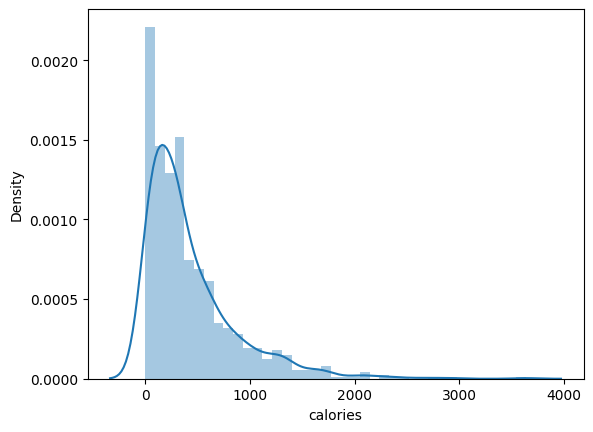

/tmp/ipykernel_3835/3874521415.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


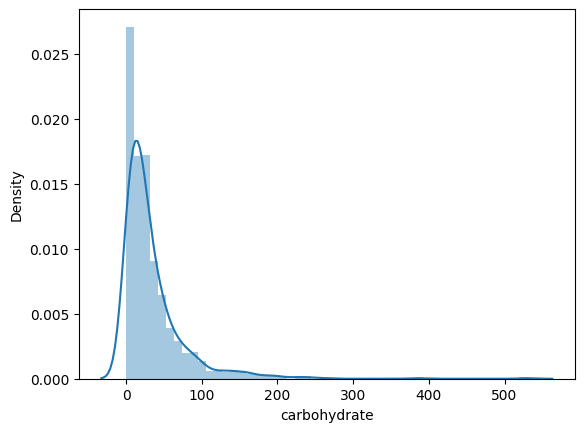

/tmp/ipykernel_3835/3874521415.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


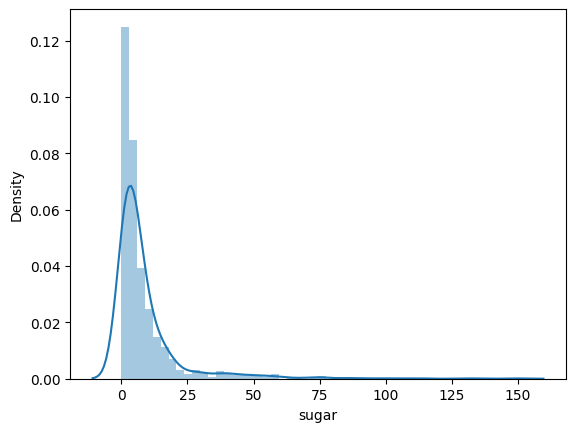

/tmp/ipykernel_3835/3874521415.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


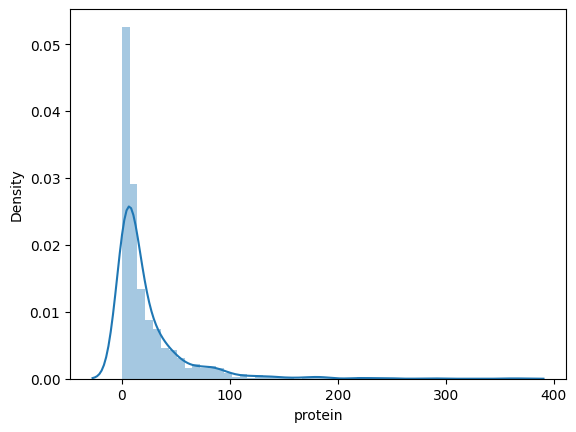

/tmp/ipykernel_3835/3874521415.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


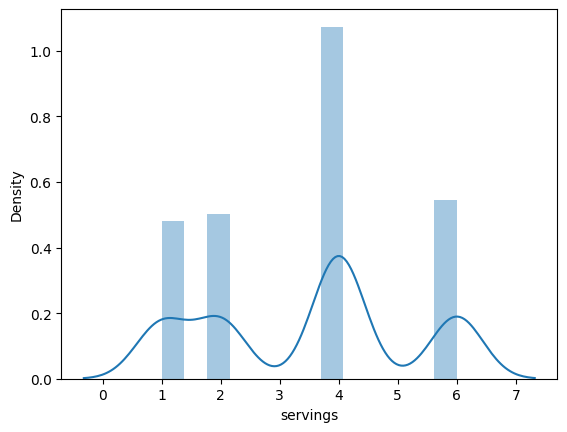

In [57]:
plot_distributions(df)

All distributions are skewed to the left, we will have to think of something later

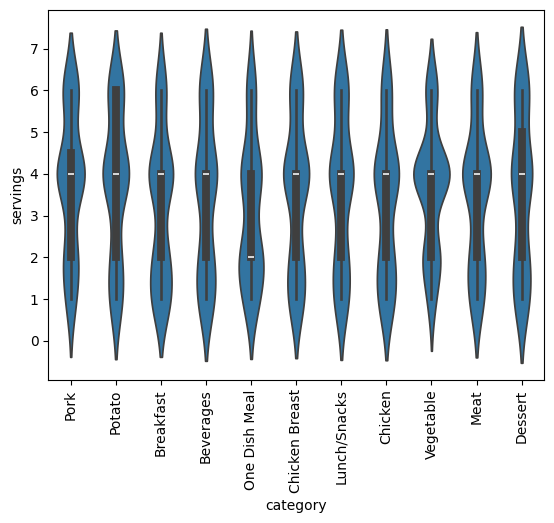

In [56]:
#show seaborn violinplot of servings and calories by category
sns.violinplot(x='category', y='servings', data=df)
plt.xticks(rotation=90)
plt.show()
 


<Figure size 3000x1500 with 0 Axes>

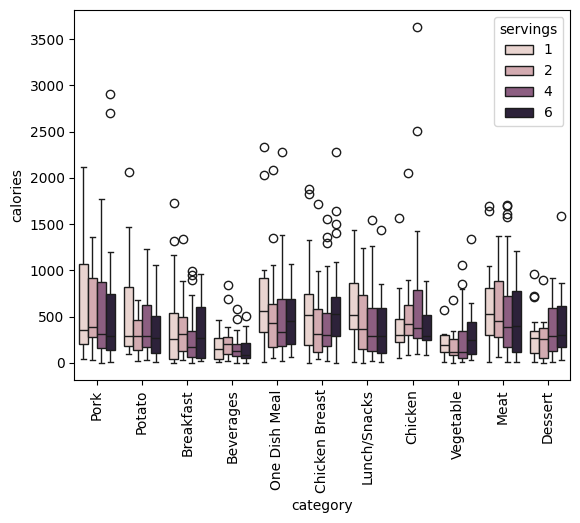

<Figure size 3000x1500 with 0 Axes>

In [59]:
#boxplot of calories and servings by category
sns.boxplot(x='category', y='calories', data=df, hue='servings')
plt.xticks(rotation=90)
#size of plot
plt.figure(figsize=(30,15))


# Data Wrangling

## Dummification of categorical variables
Now let's handle the different categories

In [46]:
#distinct values in category column
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)